# Heart Attack Data Analysis
## Exploratory Data Analysis of Cardiovascular Health Indicators

This notebook analyzes the heart attack dataset from Kaggle, exploring risk factors and patterns associated with heart attack incidents.

In [5]:
# Install kagglehub if not already installed
import subprocess
import sys

try:
    import kagglehub
except ImportError:
    print("Installing kagglehub...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kagglehub", "-q"])
    import kagglehub

# Download latest version
path = kagglehub.dataset_download("nvarisha/heart-attack-data-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\josep\.cache\kagglehub\datasets\nvarisha\heart-attack-data-analysis\versions\1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization styles
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## Load and Explore the Data

In [7]:
# Find CSV files in the downloaded dataset
from pathlib import Path
import os

# List files in the downloaded path
dataset_path = Path(path)
csv_files = list(dataset_path.glob('*.csv'))

print(f"Found {len(csv_files)} CSV file(s):")
for file in csv_files:
    print(f"  - {file.name}")

# Load the first CSV file
if csv_files:
    df = pd.read_csv(csv_files[0])
    print(f"\nLoaded: {csv_files[0].name}")
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    display(df.head())
    print("\nDataset Info:")
    display(df.info())

Found 1 CSV file(s):
  - Heart Attack Data Set.csv

Loaded: Heart Attack Data Set.csv
Shape: (303, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

## Data Overview and Summary Statistics

In [8]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## Distribution Analysis

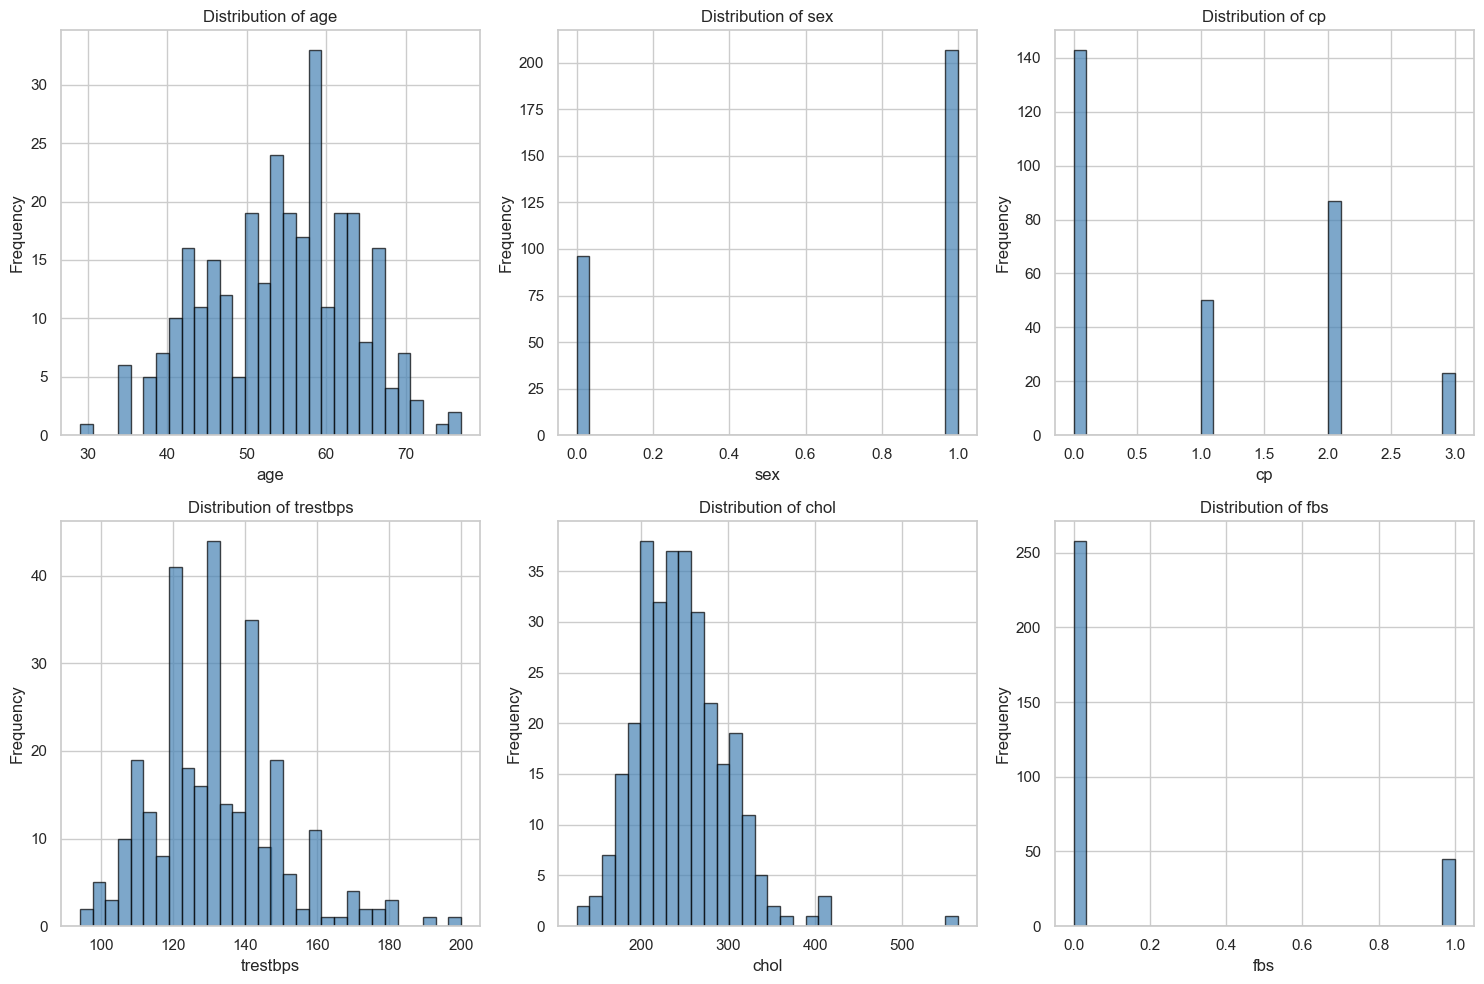

In [9]:
# Get numeric columns for visualization
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot distributions for first 6 numeric columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlation Analysis

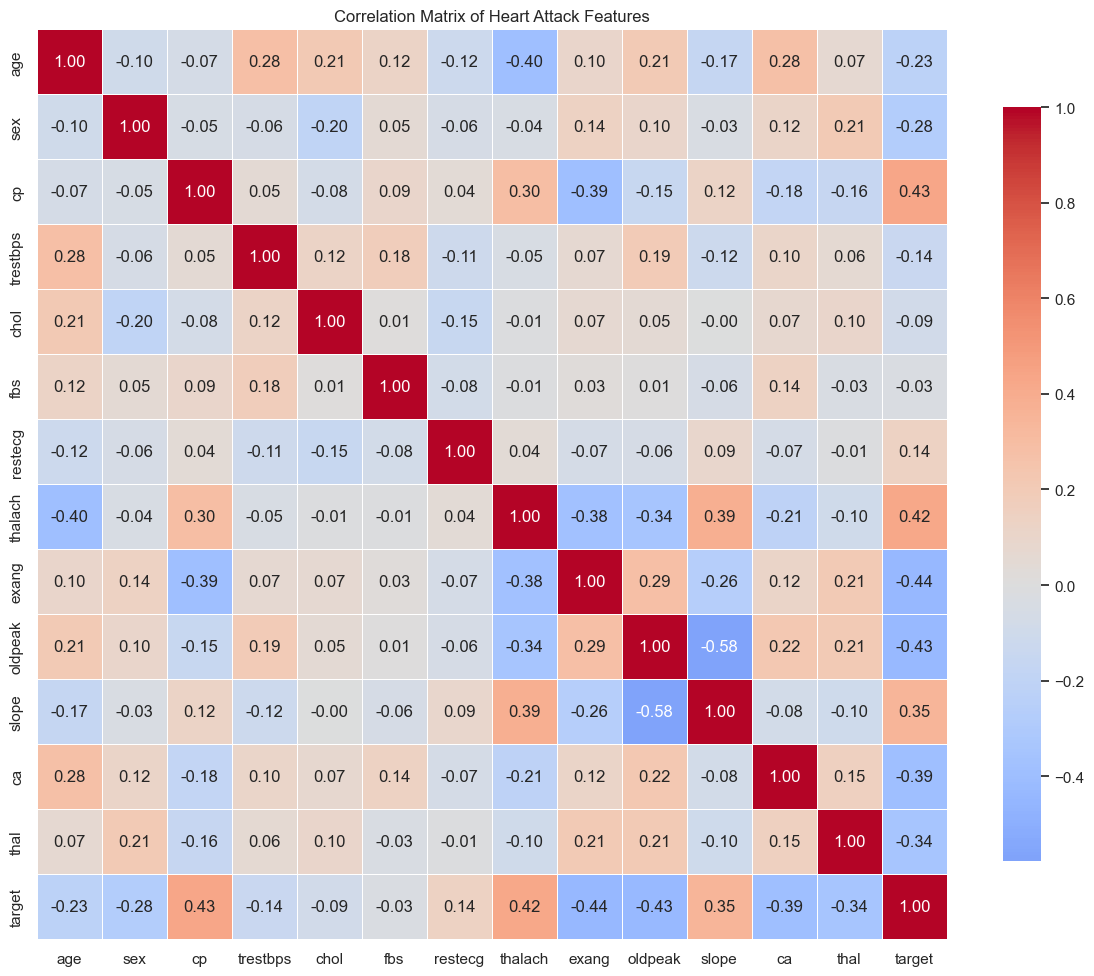


Strongest Correlations (excluding self-correlation):

age:
thalach     0.398522
trestbps    0.279351
ca          0.276326
Name: age, dtype: float64

sex:
target    0.280937
thal      0.210041
chol      0.197912
Name: sex, dtype: float64

cp:
target     0.433798
exang      0.394280
thalach    0.295762
Name: cp, dtype: float64

trestbps:
age        0.279351
oldpeak    0.193216
fbs        0.177531
Name: trestbps, dtype: float64

chol:
age        0.213678
sex        0.197912
restecg    0.151040
Name: chol, dtype: float64

fbs:
trestbps    0.177531
ca          0.137979
age         0.121308
Name: fbs, dtype: float64

restecg:
chol      0.151040
target    0.137230
age       0.116211
Name: restecg, dtype: float64

thalach:
target    0.421741
age       0.398522
slope     0.386784
Name: thalach, dtype: float64

exang:
target     0.436757
cp         0.394280
thalach    0.378812
Name: exang, dtype: float64

oldpeak:
slope      0.577537
target     0.430696
thalach    0.344187
Name: oldpeak, dtype:

In [10]:
# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Heart Attack Features')
plt.tight_layout()
plt.show()

# Find strong correlations with the target variable (if it exists)
if len(corr_matrix.columns) > 0:
    print("\nStrongest Correlations (excluding self-correlation):")
    for col in corr_matrix.columns:
        strong_corr = corr_matrix[col].abs().sort_values(ascending=False)[1:4]
        if len(strong_corr) > 0:
            print(f"\n{col}:")
            print(strong_corr)

## Pairwise Relationships (Scatter Plots)

<Figure size 1200x1000 with 0 Axes>

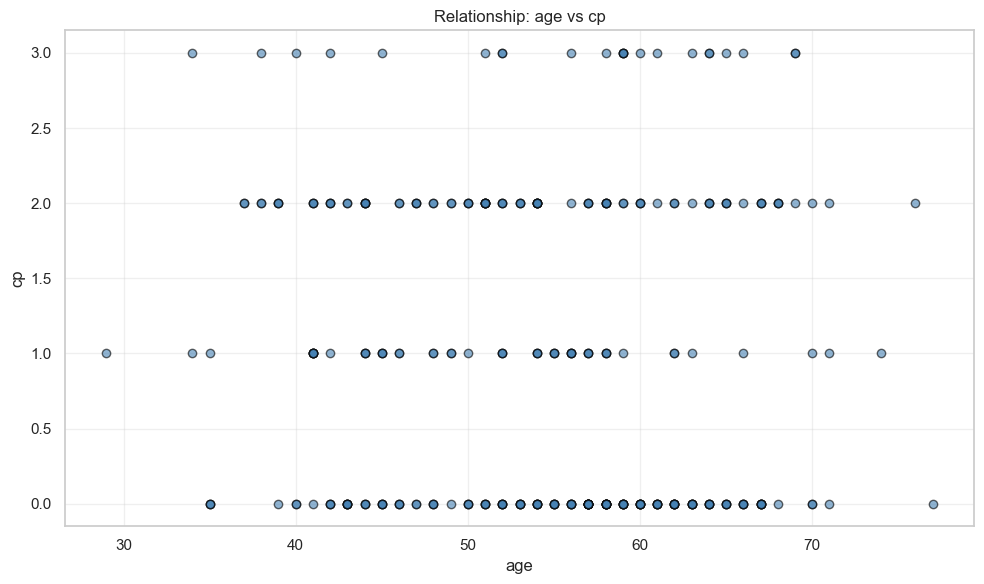

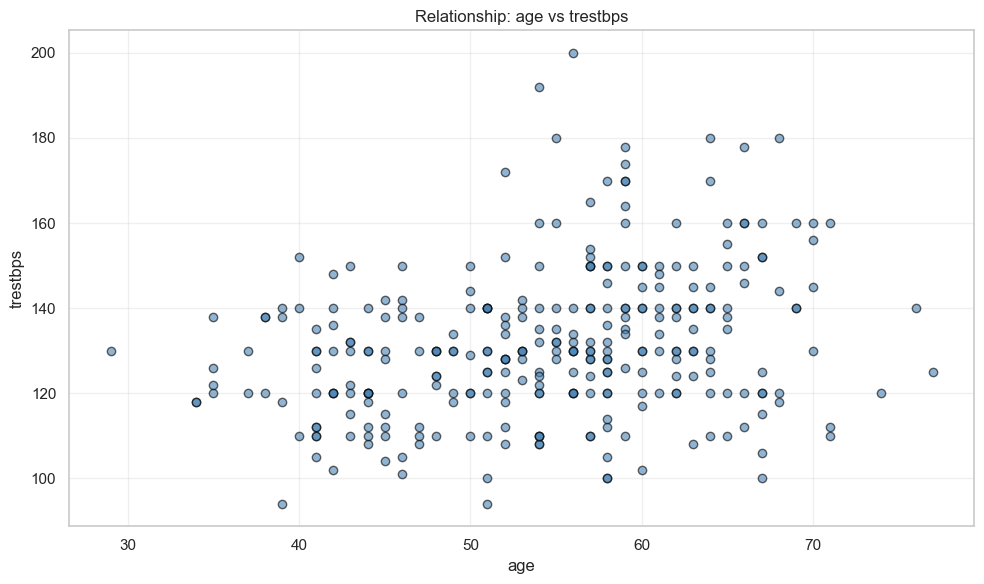

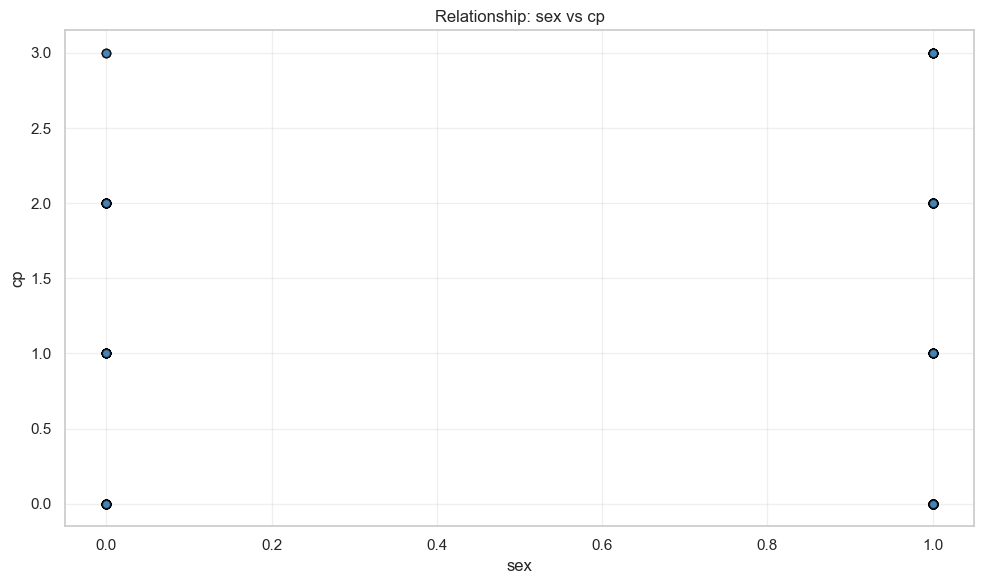

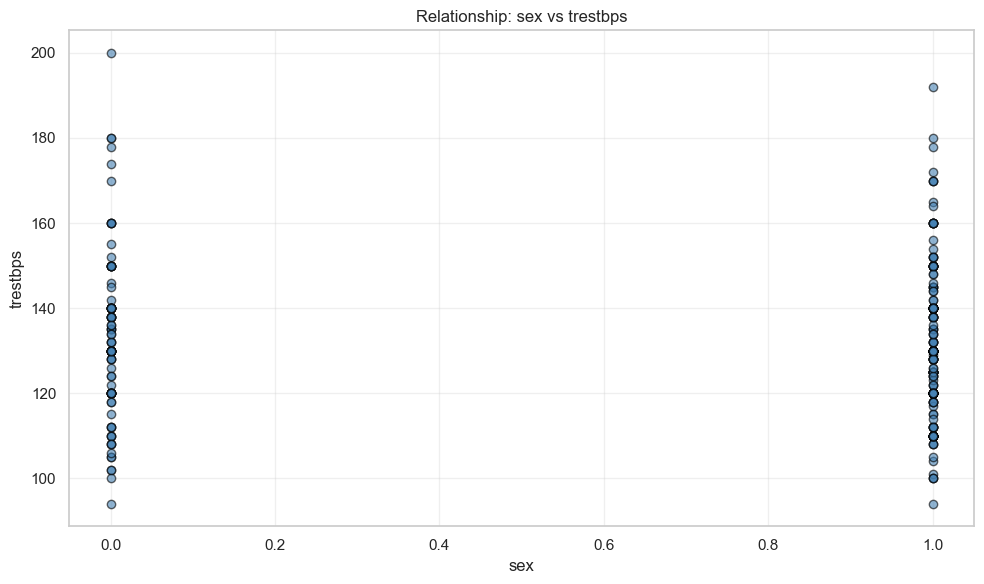

In [11]:
# Create pairplot for first 4 numeric columns
if len(numeric_cols) >= 2:
    sample_cols = numeric_cols[:4]
    plt.figure(figsize=(12, 10))
    
    # Create scatter plots for first few variable pairs
    for i, col1 in enumerate(sample_cols[:2]):
        for j, col2 in enumerate(sample_cols[2:4]):
            plt.figure(figsize=(10, 6))
            plt.scatter(df[col1].dropna(), df[col2].dropna(), alpha=0.6, color='steelblue', edgecolors='black')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.title(f'Relationship: {col1} vs {col2}')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

## Box Plots and Outlier Analysis

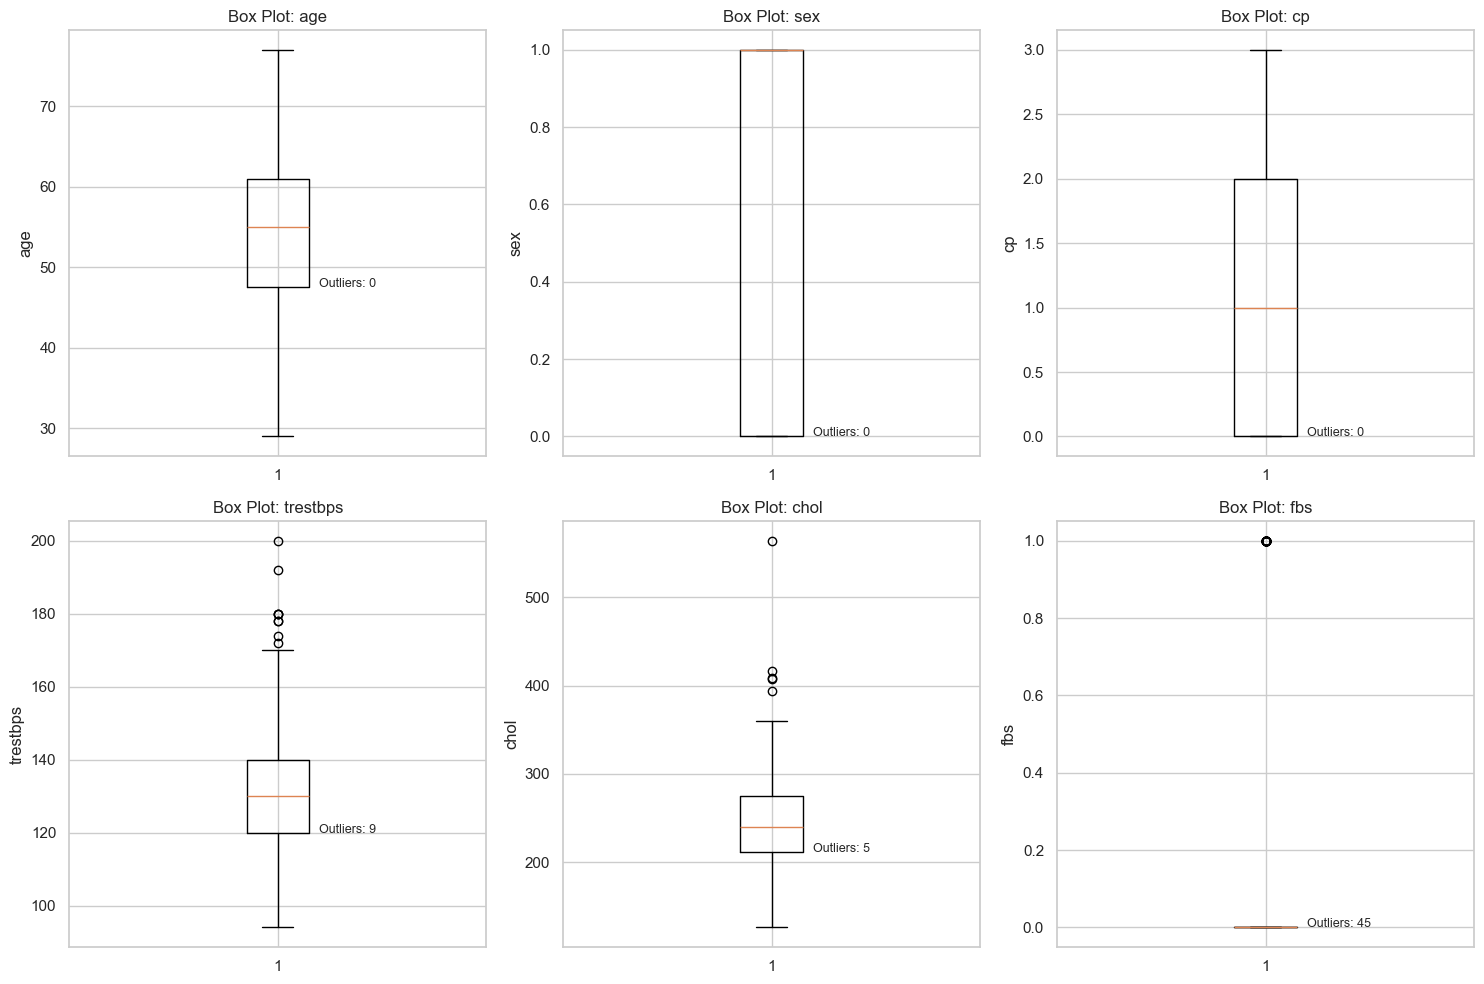

In [12]:
# Box plots for first 6 numeric columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)
    
    # Calculate outliers using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    axes[idx].text(1.1, Q1, f'Outliers: {len(outliers)}', fontsize=9)

plt.tight_layout()
plt.show()